# KNN Results
### Sample of results
KNeighborsClassifier applied

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

In [2]:
df = pd.read_csv("/media/arnauinez/ExtremeSSD/results/fifo/50/data.csv")
df = df[["cmd", "audio", "adas", "vision", "maxload", "loadstd", "valid"]]
df = df[df.maxload != 0]

#### Feasible Configs

In [3]:
nonvalid, valid = df["valid"].value_counts(normalize=True).mul(100)
print("\nFeasible: {} Non-Feasible: {}".format(valid, nonvalid))


Feasible: 29.225736095965104 Non-Feasible: 70.7742639040349


#### We scale and normalize our data.

In [4]:
def min_max_scaler(df):
    x = df.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    df[6] = df[6].astype(int)
    return df

In [5]:
scaled_df = min_max_scaler(df)

In [6]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Looking for the best K in function of the generated error. Take into account that we should not overfit the model by using a large K, instead we should keep the minimum one.

In [8]:
k_range = range(1, 30)

In [9]:
def best_k(k_range):
    error = []
    for i in k_range:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        error.append(np.mean(y_pred != y_test))
    return error

In [10]:
error = best_k(k_range)

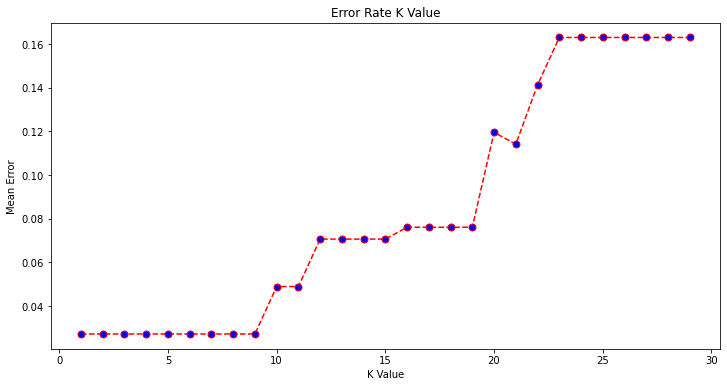

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(k_range, error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=7)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)

(<Figure size 864x864 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

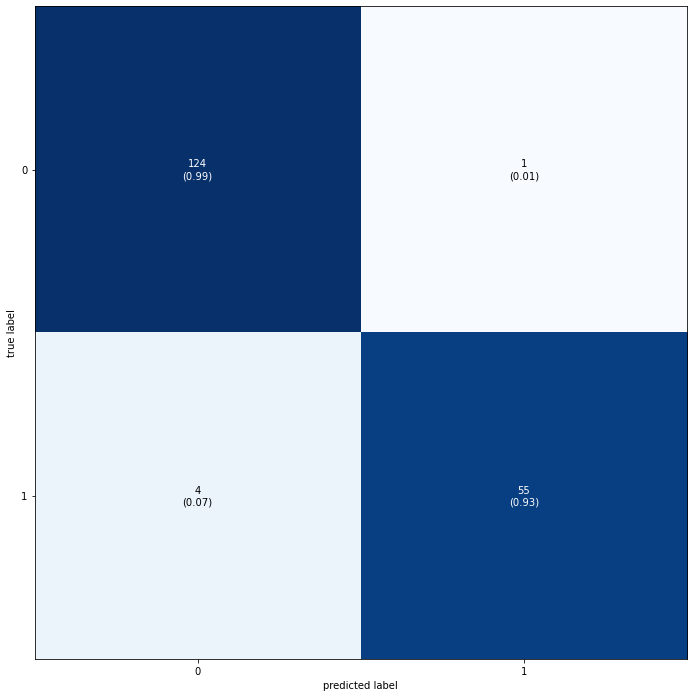

In [14]:
plot_confusion_matrix(conf_mat=conf_matrix, figsize=(12, 12), show_normed=True)

In [15]:
y_pred_prob = knn.predict_proba(X_test)
preds = y_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

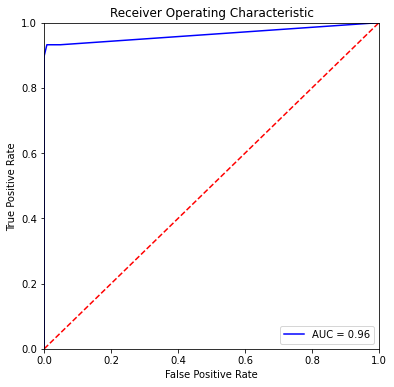

In [16]:
plt.figure(figsize=(6, 6))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [17]:
knn_accuracy = round(100 * accuracy_score(y_test, y_pred), 4)
print(knn_accuracy, "%")

97.2826 %


In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       125
        True       0.98      0.93      0.96        59

    accuracy                           0.97       184
   macro avg       0.98      0.96      0.97       184
weighted avg       0.97      0.97      0.97       184

